# Integration of prosumer peer-to-peer trading decisions into energy community modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys  
import os
import pickle
import threading
import multiprocessing as mp

In [2]:
import warnings
import Classes_definition_2021 as cp2p
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
warnings.filterwarnings('error')
%load_ext autoreload
%autoreload 2

To explore answers from the survey please see Survey_results_19032020.ipynb
Here we use the processed answers to compare SC and P2P communities on similar basis at the individual, community and grid levels. See Table 1 of the SI.

To run the community you only have to run the following function.
Behind the scenes there is the Classes_definition.py script

Figures were made using the script Graphs_P3.R

In [3]:
def run_comm(seed):
    '''
    Using a predetermined seed to initialize a pseudorandom number generator.
    Writes aggregated results of SC and P2P communities on a file.
    '''
    # Predefined data
    Data={'community_size':100, # number of households
     'timestep':0.25, # data resolution 0.25 = 15 min
     'seed':seed, # For reproducibility
     'country_code':'DE', # other countries can be used (with other timesteps)
     'pv_penetration':50, # % of community with PV
     'batt_penetration':50, # % of households with PV that also have Battery
     'retail_price':0.28, # flat retail price
     'export_price':0.04, # flat FiT or export price
     'predet_bhv':False, # different behaviours can be used (False, 'high',
                         # 'medium', 'low'). Gets the corresponding group of 
                         # the survey according to their answers on trading.
                         # The distribution is divided in three slots.
           
     'ILR':1, # inverter load ratio, default to 1
     'test_sc':False, # To test SC with P2P price structure
     'cut':'q0', # Quartiles of trading, similar to predet_bhv, but with higher
                 # resolution. The distribution is divided in ten slots.
     'PtC':False, # Possibility to use Production to consumption ratio, 
                   # instead of random allocation of PV capacities accross community
     'parallel':True # If multithreading is to be used, it deletes 
                      # attributes from the class to run quicker.
     }
    # Run SC community and save aggregated results
    comP2PDict={}
    comNormal=cp2p.SCCommunity(Data) # initialize
    comNormal.runAll() # Run all methods
    filename='Community_dataset.csv'
    pd.DataFrame.from_dict(comNormal.out, orient='index').T.to_csv(filename, mode='a', header=False)
    
    
    comP2PDict=cp2p.P2PCommunity(Data) # initialize
    comP2PDict.getPrices(comNormal) 
    comP2PDict.getP2PCommunity()
    comP2PDict.endP2P()
    comP2PDict.out_hh.to_csv(filename, mode='a', header=False)
    return

In [4]:
%%time
run_comm(1)

######################
Getting demand and PV profiles
inside
----------------------------------
Country: DE
Data resolution: 15.0
Original year: 2010.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtype: float64%
######################
Getting PV distribution
Country: DE
0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899######################
Getting demand and PV profiles
inside
----------------------------------
Country: DE
Data resolution: 15.0
Original year: 2010.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtype: float64%
######################
Getting PV distribution
Country: DE
012345678910111213141516

Once several runs are made (1000 in the paper's case), we proceed to plot the results using R.

Figure 1 is produced using the output from the previous dataset (final_dataset.csv)

To produce Figure 2 B, C and D, 1000 simulations were used (only maximum power import and export from  final_dataset.csv, rearrenged in peak_tidy.csv).

to produce Figure 2 A the following approach was used:

## In order to take a look at the peaks parallel should be set to False. 

In [5]:
Data={'community_size':100, # number of households
     'timestep':0.25, # data resolution 0.25 = 15 min
     'seed':164, # For reproducibility
     'country_code':'DE', # other countries can be used (with other timesteps)
     'pv_penetration':50, # % of community with PV
     'batt_penetration':50, # % of households with PV that also have Battery
     'retail_price':0.28, # flat retail price
     'export_price':0.04, # flat FiT or export price
     'predet_bhv':False, # different behaviours can be used (False, 'high',
                         # 'medium', 'low'). Gets the corresponding group of 
                         # the survey according to their answers on trading.
                         # The distribution is divided in three slots.
           
     'ILR':1, # inverter load ratio, default to 1
     'test_sc':False, # To test SC with P2P price structure
     'cut':'q0', # Quartiles of trading, similar to predet_bhv, but with higher
                 # resolution. The distribution is divided in ten slots.
     'PtC':False, # Possibility to use Production to consumption ratio, 
                   # instead of random allocation of PV capacities accross community
     'parallel':False # If multithreading is to be used, it deletes 
                      # attributes from the class to run quicker.
     }
    # Run SC community and save aggregated results
comP2PDict={}
comNormal=cp2p.SCCommunity(Data) # initialize
comNormal.runAll() # Run all methods
comP2PDict=cp2p.P2PCommunity(Data) # initialize
comP2PDict.getPrices(comNormal) 
comP2PDict.getP2PCommunity()
comP2PDict.endP2P()

######################
Getting demand and PV profiles
inside
----------------------------------
Country: DE
Data resolution: 15.0
Original year: 2010.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtype: float64%
######################
Getting PV distribution
Country: DE
0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899######################
Getting demand and PV profiles
inside
----------------------------------
Country: DE
Data resolution: 15.0
Original year: 2010.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtype: float64%
######################
Getting PV distribution
Country: DE
012345678910111213141516

### To explore prosumer decision strategies impact we run the following function:

In [6]:
def run_comm_decisions(bhv):
    '''
    Using a predetermined seed to initialize a pseudorandom number generator.
    Writes aggregated results of SC and P2P communities on a file.
    '''
    # Predefined data
    Data={'community_size':100, # number of households
     'timestep':0.25, # data resolution 0.25 = 15 min
     'seed':1, # For reproducibility
     'country_code':'DE', # other countries can be used (with other timesteps)
     'pv_penetration':50, # % of community with PV
     'batt_penetration':50, # % of households with PV that also have Battery
     'retail_price':0.28, # flat retail price
     'export_price':0.04, # flat FiT or export price
     'predet_bhv':bhv, # different behaviours can be used (False, 'high',
                         # 'medium', 'low'). Gets the corresponding group of 
                         # the survey according to their answers on trading.
                         # The distribution is divided in three slots.
           
     'ILR':1, # inverter load ratio, default to 1
     'test_sc':False, # To test SC with P2P price structure
     'cut':'q0', # Quartiles of trading, similar to predet_bhv, but with higher
                 # resolution. The distribution is divided in ten slots.
     'PtC':False, # Possibility to use Production to consumption ratio, 
                   # instead of random allocation of PV capacities accross community
     'parallel':True # If multithreading is to be used, it deletes 
                      # attributes from the class to run quicker.
     }
    # Run SC community and save aggregated results$
    comP2PDict={}
    comNormal=cp2p.SCCommunity(Data) # initialize
    comNormal.runAll() # Run all methods
    #filename='../Output/optimal_trading2.csv'
    #comNormal.out_hh.to_csv(filename, mode='a', header=False)
    comP2PDict=cp2p.P2PCommunity(Data) # initialize
    comP2PDict.getPrices(comNormal) 
    comP2PDict.getP2PCommunity()
    comP2PDict.endP2P()
    #comP2PDict.out_hh.to_csv(filename, mode='a', header=False)
    return 

In [7]:
bhv_arr=[False, 'high','medium', 'low']

In [8]:
#Run this for different cuts
mp.freeze_support()
pool=mp.Pool(processes=20)
pool.starmap_async(run_comm_decisions, zip([bhv for bhv in bhv_arr]))
pool.close()
pool.join()

######################
######################
######################
######################
Getting demand and PV profiles
Getting demand and PV profiles
Getting demand and PV profiles
Getting demand and PV profiles
inside
inside
inside
inside
----------------------------------
----------------------------------
----------------------------------
----------------------------------
Country: DE
Country: DE
Country: DE
Country: DE
Data resolution: 15.0
Data resolution: 15.0
Data resolution: 15.0
Data resolution: 15.0
Original year: 2010.0
Original year: 2010.0
Original year: 2010.0
Original year: 2010.0
Sample size: 74.0
Sample size: 74.0
Sample size: 74.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Average consumption per year: 4685.069393693686
Average consumption per year: 4685.069393693686
Average consumption per year: 4685.069393693686
Country: DE
Country: DE
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtyp

# Supplementary Information 

Willingness to sell electricity Figure was made using table df_core.csv which are the answers from the survey for the questions regarding trading decisions depending on price, SOC and time of the day. Figure is made in R (Graphs_P3.R)

To compare SC communities with SC communities with P2P price structure and P2P communities we use the following function. The figures were made using the script P2P_SC.R

In [9]:
def run_comm_comparison(seed):
    Data={'community_size':100,
     'timestep':0.25,
     'seed':seed,
     'country_code':'DE',
     'pv_penetration':50,
     'batt_penetration':50,
     'retail_price':0.28,
     'export_price':0.04,
     'predet_bhv':False,
     'ILR':1,
     'test_sc':True,
     'cut':'q0',
      'PtC':False,
      'parallel':True
     }
    #######################################
    # Create the SC community
    comP2PDict={}
    comNormal=cp2p.SCCommunity(Data)
    comNormal.runAll()
    filename='../Output/sc_vs_p2p_2.csv'
    #comNormal.out_hh.to_csv(filename, mode='a', header=False)
    #######################################
    # Create the SC community with P2P price structure
    comP2PDictSC=cp2p.P2PCommunity(Data)
    comP2PDictSC.getPrices(comNormal)
    comP2PDictSC.getP2PCommunity()
    comP2PDictSC.endP2P()
    #comP2PDict.out_hh.to_csv(filename, mode='a', header=False)
    ########################################
    # Create the P2P community  
    Data.update(test_sc=False)
    comNormal=cp2p.SCCommunity(Data)
    comNormal.runAll()
    comP2PDict=cp2p.P2PCommunity(Data)
    comP2PDict.getPrices(comNormal)
    comP2PDict.getP2PCommunity()
    comP2PDict.endP2P()
    #comP2PDict.out_hh.to_csv(filename, mode='a', header=False)
    return 

In [10]:
run_comm_comparison(1)

######################
Getting demand and PV profiles
inside
----------------------------------
Country: DE
Data resolution: 15.0
Original year: 2010.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtype: float64%
######################
Getting PV distribution
Country: DE
0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899######################
Getting demand and PV profiles
inside
----------------------------------
Country: DE
Data resolution: 15.0
Original year: 2010.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtype: float64%
######################
Getting PV distribution
Country: DE
012345678910111213141516

Finally, to get the results for the sensitivity analysis, we iterate over community sizes, PV and battery penetrations, which results in the dataset sensitivity.csv and sensitivity_means.csv for the mean values. Figures were made using the script sensitivity.R

### For the duck-curve results of the section on decision-making strategies, we take a look at the three predetermined types of behavior

In [11]:
Data={'community_size':100, # number of households
     'timestep':0.25, # data resolution 0.25 = 15 min
     'seed':164, # For reproducibility
     'country_code':'DE', # other countries can be used (with other timesteps)
     'pv_penetration':50, # % of community with PV
     'batt_penetration':50, # % of households with PV that also have Battery
     'retail_price':0.28, # flat retail price
     'export_price':0.04, # flat FiT or export price
     'predet_bhv':'low', # different behaviours can be used (False, 'high',
                         # 'medium', 'low'). Gets the corresponding group of 
                         # the survey according to their answers on trading.
                         # The distribution is divided in three slots.
           
     'ILR':1, # inverter load ratio, default to 1
     'test_sc':False, # To test SC with P2P price structure
     'cut':'q0', # Quartiles of trading, similar to predet_bhv, but with higher
                 # resolution. The distribution is divided in ten slots.
     'PtC':False, # Possibility to use Production to consumption ratio, 
                   # instead of random allocation of PV capacities accross community
     'parallel':False # If multithreading is to be used, it deletes 
                      # attributes from the class to run quicker.
     }
    # Run SC community and save aggregated results
comP2PDict={}
comNormal=cp2p.SCCommunity(Data) # initialize
comNormal.runAll() # Run all methods
comP2PDict_low=cp2p.P2PCommunity(Data) # initialize
comP2PDict_low.getPrices(comNormal) 
comP2PDict_low.getP2PCommunity()
comP2PDict_low.endP2P()
Data.update(predet_bhv='medium')
comP2PDict_med=cp2p.P2PCommunity(Data) # initialize
comP2PDict_med.getPrices(comNormal) 
comP2PDict_med.getP2PCommunity()
comP2PDict_med.endP2P()
Data.update(predet_bhv='high')
comP2PDict_high=cp2p.P2PCommunity(Data) # initialize
comP2PDict_high.getPrices(comNormal) 
comP2PDict_high.getP2PCommunity()
comP2PDict_high.endP2P()

######################
Getting demand and PV profiles
inside
----------------------------------
Country: DE
Data resolution: 15.0
Original year: 2010.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtype: float64%
######################
Getting PV distribution
Country: DE
0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899######################
Getting demand and PV profiles
inside
----------------------------------
Country: DE
Data resolution: 15.0
Original year: 2010.0
Sample size: 74.0
Average consumption per year: 4685.069393693686
Country: DE
Total generation per year: PV    1535.83138
dtype: float64
Capacity factor: PV    17.53
dtype: float64%
######################
Getting PV distribution
Country: DE
012345678910111213141516

#### getKPI creates a file called week_power.csv in the Output folder, with the average power exchanges at the community level

In [12]:
1+1

2

In [94]:
comP2PDict_low.getKPI(comNormal)

True
1.2194063098988153
True
1.229886249239641
False
-7.750888888602425e-06
True
0.0009238333333334015
True
0.13245320346373468
4.871987273151623
4.739534069687888
0.6158460553544145
0.5533930528363354


In [95]:
comP2PDict_med.getKPI(comNormal)

True
2.3491630191187554
True
2.369352422554037
False
-0.0005975668603189765
False
0.0
True
0.25695055946102485
4.996484629148913
4.739534069687888
0.6158460553544145
0.5272703714772835


In [96]:
comP2PDict_high.getKPI(comNormal)

True
2.7326276661993347
True
2.75611267849618
False
-0.008192506182785553
True
0.03572383333333329
True
0.2419839785578013
4.98151804824569
4.739534069687888
0.6158460553544145
0.5753209574764951


In [13]:
df_low=pd.read_csv('../Output/week_power_low.csv')
df_med=pd.read_csv('../Output/week_power_med.csv')
df_high=pd.read_csv('../Output/week_power_high.csv')

Text(0.5, 0, 'Time [hours]')

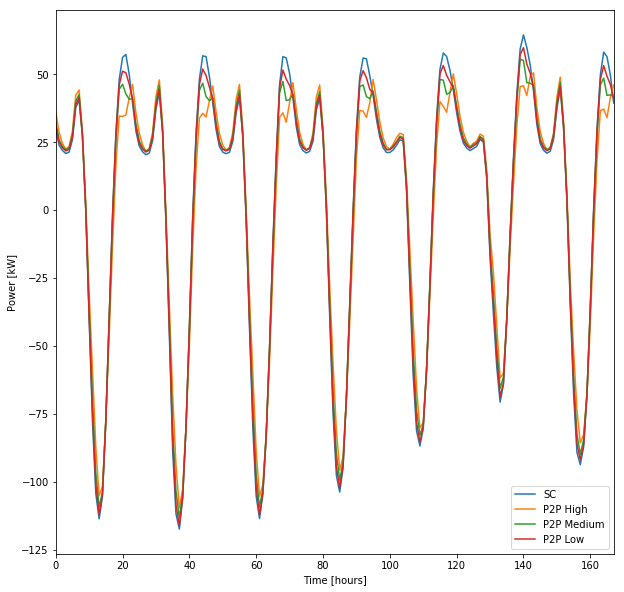

In [14]:
fig,ax=plt.subplots(figsize=(10,10))
#df_fig2.loc[:,['sc','p2p']].plot(ax=ax)
df_high.loc[:,['sc','p2p']].plot(ax=ax)
df_med.loc[:,['p2p']].plot(ax=ax)
df_low.loc[:,['p2p']].plot(ax=ax)
ax.legend(["SC", "P2P High",'P2P Medium', 'P2P Low'])
ax.set_ylabel('Power [kW]')
ax.set_xlabel('Time [hours]')

The Excel file strategies_peak_week.xlsx provides the calculations for the values in the paper refering to peak to peak amplitude.